<a href="https://colab.research.google.com/github/parklaus1078/dl_simple_practices/blob/main/dl_simple_practices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content

/content


In [3]:
%pwd

'/content'

# 제조 데이터의 분류기 실습
---
- sklearn의 model을 사용하여 Classifier를 학습한다.
- 생성한 Classifier의 성능 개선을 위한 방법을 이해한다.
- Classifier에서 사용가능한 주요 성능 지표를 이해한다.

## 문제: Binary Classification

In [10]:
# Library & Data load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("exercise1.csv")

In [11]:
df.head()

,a1,a2,a3,a4,a5,a6,target
0,24,0.29,700,0.013,100,1.4,0
1,44,0.47,400,0.012,20,0.6,0
2,13,0.21,1000,0.045,40,1.7,0
3,8,0.25,400,0.008,60,0.8,0
4,38,0.15,700,0.044,40,1.2,0


In [12]:
df.shape

(1000, 7)

In [13]:
df["target"].unique()           # Target column's values

array([0, 1])

In [14]:
df["target"].value_counts()

0    588
1    412
Name: target, dtype: int64

## 데이터 탐색

In [15]:
# Data exploration
df.describe()

,a1,a2,a3,a4,a5,a6,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,28.821000,0.283240,821.300000,0.027491,117.180000,1.712600,0.412000
std,10.502631,0.103347,254.560624,0.010786,45.428089,0.707079,0.492441
min,5.000000,0.050000,300.000000,0.005000,20.000000,0.200000,0.000000
25%,25.000000,0.240000,700.000000,0.021000,90.000000,1.300000,0.000000
50%,29.000000,0.290000,900.000000,0.027000,120.000000,1.800000,0.000000
75%,35.000000,0.340000,1000.000000,0.034000,150.000000,2.300000,1.000000
max,50.000000,0.500000,1200.000000,0.050000,200.000000,2.900000,1.000000


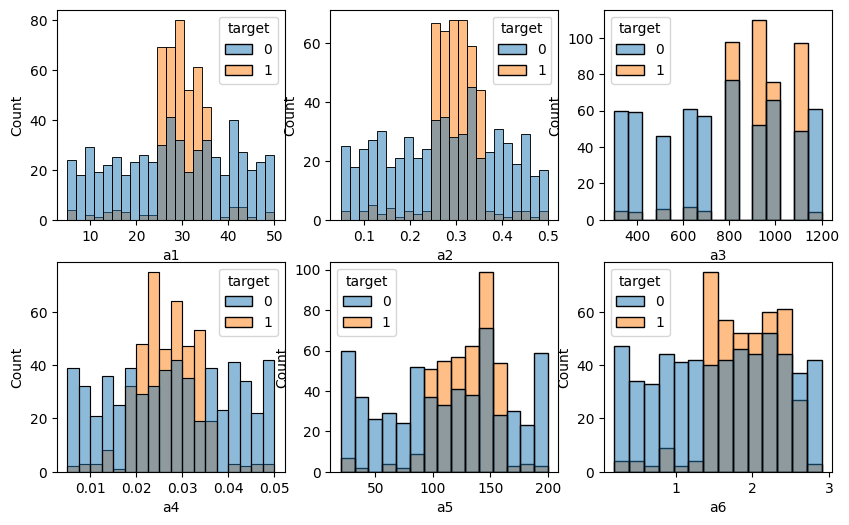

In [18]:
# Data Visualization
nrows, ncols = 2, 3                                                 # coordinate of plots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)                   # plots are described in 2 x 3 formation
fig.set_size_inches(10, 6)

for i in range(nrows):
    for j in range(ncols):
        attr = i * ncols + j
        sns.histplot(x=df.columns[attr], data=df, ax=axs[i][j], hue="target")

## 주요 코드
---
1. Split a dataset into trainset and test set
    - ```train_test_split```
2. Generate Model Instance
    - ```DecisionTreeClassifier```
3. train
    - ```.fit(X, y)```
        - X 를 y에 맞춘다.
4. Evaluate
    - Classifier's evaluation : Accuracy
    - ```accuracy_score()```

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Split data
X = df.iloc[:, :6]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Generate Model Instance
model = DecisionTreeClassifier(random_state=42)

# 3. Train
model.fit(X_train, y_train)

# 4. Evaluate
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8

## 다른 분류기

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 1. Split data
# splitted already

# 2. Generate Model Instance
rf_cls = RandomForestClassifier(random_state=42)
gb_cls = GradientBoostingClassifier(random_state=42)
xgb_cls = XGBClassifier(random_state=42)
lgb_cls = LGBMClassifier(random_state=42)

# 3. Train
rf_cls.fit(X_train, y_train)
gb_cls.fit(X_train, y_train)
xgb_cls.fit(X_train, y_train)
lgb_cls.fit(X_train, y_train)

# 4. Evaluate
y_pred_rf = rf_cls.predict(X_test)
y_pred_gb = gb_cls.predict(X_test)
y_pred_xgb = xgb_cls.predict(X_test)
y_pred_lgb = lgb_cls.predict(X_test)

print("Random Forest Classifier's accuracy : {}".format(accuracy_score(y_test, y_pred_rf)))
print("Gradident Boosting Classifier's accuracy : {}".format(accuracy_score(y_test, y_pred_gb)))
print("XGBoost Classifier's accuracy : {}".format(accuracy_score(y_test, y_pred_xgb)))
print("light gbm Classifier's accuracy : {}".format(accuracy_score(y_test, y_pred_lgb)))

[LightGBM] [Info] Number of positive: 330, number of negative: 470
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.412500 -> initscore=-0.353640
[LightGBM] [Info] Start training from score -0.353640
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


## Quiz
다음과 같이 SVC를 사용하여 모델을 생성하고, 학습을 시켰을 때 모델의 정확도를 구하시오. 모델의 성능을 높이기 위해서 할 수 있는 방법은?

In [25]:
# 문제 지문
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)


0.72

In [26]:
# 해답 : 학습 데이터의 독립 변수들이 스케일이 다름. 스케일링을 해줘야함
X_train

,a1,a2,a3,a4,a5,a6
330,35,0.23,1100,0.034,40,2.1
535,35,0.29,800,0.028,110,2.4
154,39,0.29,300,0.041,140,1.8
210,23,0.14,1000,0.032,170,0.5
8,32,0.26,800,0.029,150,2.6
...,...,...,...,...,...,...
387,34,0.32,900,0.024,110,2.6
490,5,0.42,700,0.039,50,2.1
456,27,0.29,900,0.020,130,2.0
784,28,0.32,800,0.031,140,1.4


In [28]:
# 해법
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scale = sc.fit_transform(X)                           # 중요한 점: training set와 test set의 스케일링 기준이 같아야함. 방안: 전체 스케일링 후 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42, stratify=y)
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.92

# 자전거 대여량 예측 모델 실습
---
- sklearn의 model을 사용하여 Regressor를 학습한다.
- 생성한 Regressor의 성능 개선을 위한 방법을 이해한다.
- Regressor에서 사용가능한 주요 성능 지표를 이해한다.

## 문제 정의
---
https://www.kaggle.com/c/bike-sharing-demand </br>
- Data Fields
    - **datetime** - hourly date + timestamp  
    - **season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter
    - **holiday** - whether the day is considered a holiday
    - **workingday** - whether the day is neither a weekend nor holiday
    - **weather**
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
        - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    - **temp** - temperature in Celsius
    - **atemp** - "feels like" temperature in Celsius
    - **humidity** - relative humidity
    - **windspeed** - wind speed
    - **casual** - number of non-registered user rentals initiated
    - **registered** - number of registered user rentals initiated
    - **count** - number of total rentals

In [6]:
# !pip install -q kaggle

In [8]:
# !mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
# !cp kaggle.json ~/.kaggle/

In [10]:
# !chmod 600 ~/.kaggle/kaggle.json

In [12]:
# ! kaggle competitions download -c bike-sharing-demand

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 76.1MB/s]


In [14]:
# Library & Data load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("exercise2.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [16]:
df.shape

(10886, 12)

## 데이터 탐색


In [17]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<Axes: xlabel='count', ylabel='Count'>

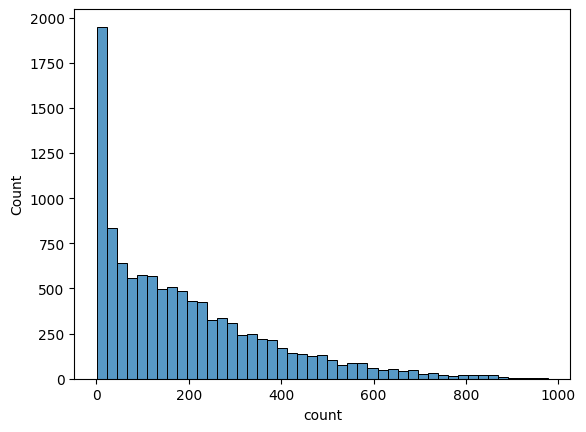

In [18]:
sns.histplot(x = df['count'])

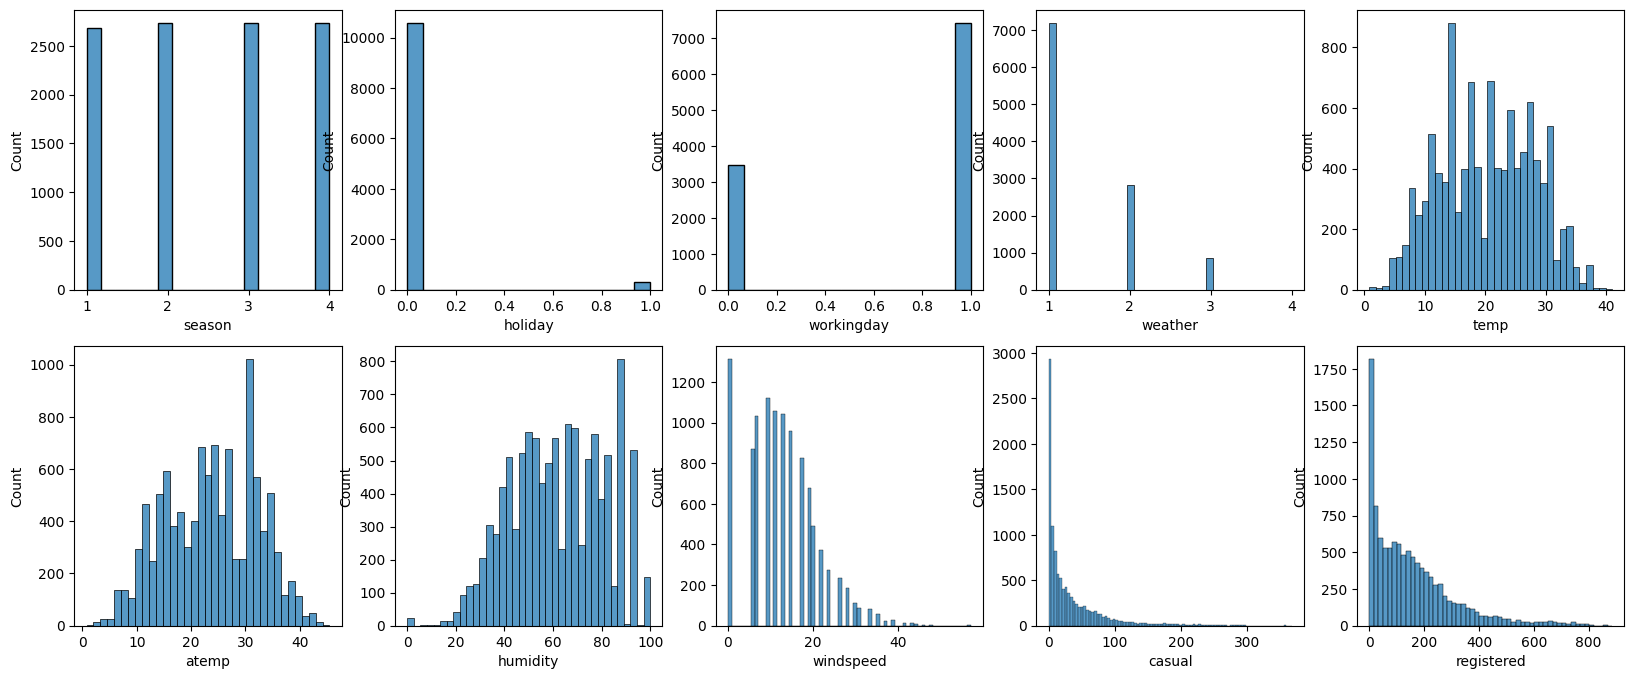

In [19]:
nrows, ncols = 2, 5
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(20, 8)

for i in range(nrows):
    for j in range(ncols):
        attr = i * ncols + j + 1
        sns.histplot(x=df.columns[attr], data=df, ax=axs[i][j])

<ipython-input-20-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

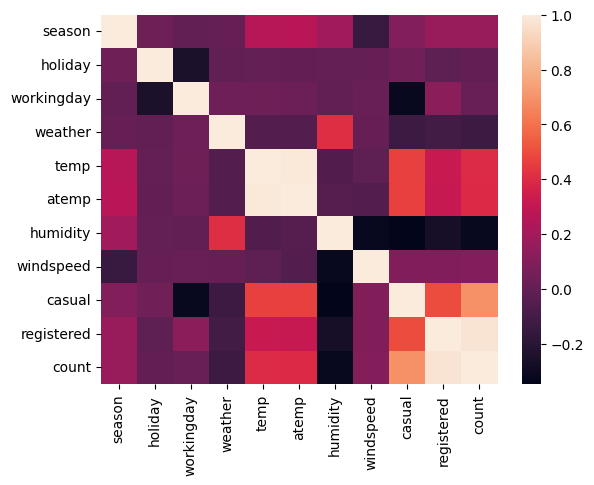

In [20]:
sns.heatmap(df.corr())                  # 숫자가 높을수록(색상이 연해질수록) 상관 관계가 높음

## 주요 코드 미리보기
---
1. Split Data
2. Generate Model Instance
3. Training
4. Evaluate

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

y = df["count"]
X = df.drop(["datetime", "count"], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

mean_squared_log_error(y_test, y_pred)

3.248909885621264e-29

<Axes: >

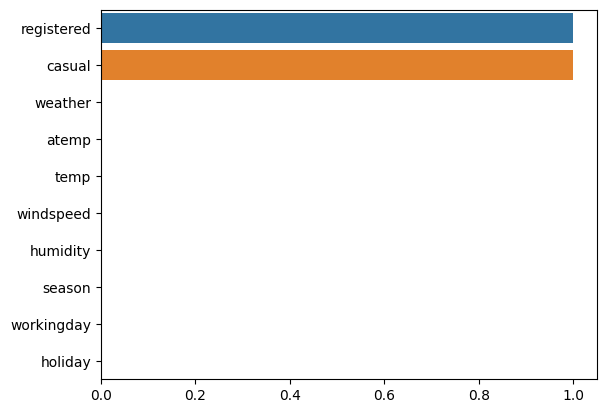

In [22]:
coef = pd.Series(lr_model.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)
# registered, casual 피쳐가 count 값과 밀접한 관계가 있다.
# 하지만, 이 피쳐들은 말 그대로, 자전거를 대여한 비회원과 회원 수이고 둘의 합이 count이기 때문에 독립 변수로 사용할 수 없는 피쳐들이다. => 기각.

## 코드 개선
---
문제: 앞서 알아낸 것처럼, 상관계수를 따져보았을 때, registered 와 casual이라는 피쳐들이 count 값에 가장 큰 영향력을 행사한다는 것으로 추정했지만, 두 피쳐의 값들은 자전거를 대여한 비회원과 회원 수를 나타내는 값들이고, 그 둘의 합이 count 피쳐를 만들어내는 형태이기 때문에, 이 분석은 잘못되었다. 그렇다면, 분석을 개선하기 위하여 취하여야 할 행위는 무엇일까?
- Data 관점
    - 의미있는 feature 생성
    - 불필요한 feature 삭제
    - 데이터 형태 변환: scaling, encoding
- Model 관점
    - Linear Regressor
    - RandomForest Regressor
    - XGBRegressor
    - LGBMRgressor

## Data 관점

### 의미있는 feature 생성

In [23]:
df["datetime"] = df["datetime"].astype("datetime64")
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


### 불필요한 feature 삭제

In [24]:
df.drop(["datetime", "casual", "registered"], axis=1, inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


### 데이터 형태 변환
- y를 정규 분포로 변환
    - 왜? count의 히스토그램을 보았을 때, 정규 분포가 아니고 skewed 형태인데, 본디 머신러닝의 기본 전재는 "데이터가 정규 분포를 따른다."이다. 고로, 종속 변수를 정규 분포로 변환해주어야 한다.

<Axes: xlabel='count', ylabel='Count'>

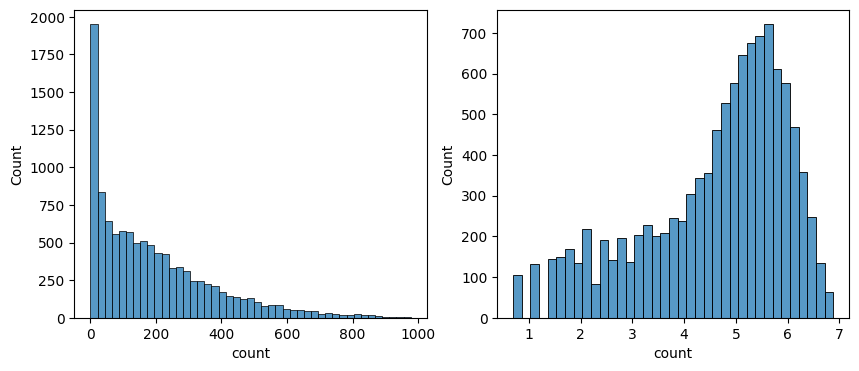

In [26]:
y_log = np.log1p(y)

nrows, ncols = 1, 2
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(10, 4)
sns.histplot(y, ax=axs[0])
sns.histplot(y_log, ax=axs[1])

- Categorical 변수 원핫 인코딩 : ```pd.get_dummies(df=데이터셋, columns=[범주형 변수 피쳐들])```

In [29]:
df = pd.get_dummies(df, columns=["year", "month", "day", "hour", "holiday", "workingday", "season", "weather"])

In [30]:
df.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'count', 'year_2011',
       'year_2012', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13',
       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'holiday_0', 'holiday_1',
       'workingday_0', 'workingday_1', 'season_1', 'season_2', 'season_3',
       'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

In [31]:
y = y_log
X = df.drop(["count"], axis=1, inplace=False)

- Z-score 변환

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=42)

In [34]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred))      # y 값들이 현재 로그 스케일링 되어있기 때문에 explonential 변환(e*)로 돌려놓음

0.3418249583393837

<Axes: >

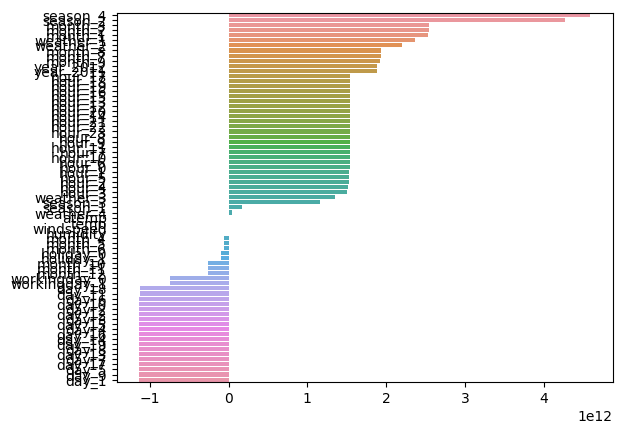

In [36]:
coef = pd.Series(lr_model.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)
coef_sort.head(10)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

## Model 관점
- RandomForest
- XGBoost
- Light GBM

In [38]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)
lgbm_model = LGBMRegressor(random_state=42, verbose=-1)

model_list = [lr_model, rf_model, xgb_model, lgbm_model]
for model in model_list:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    m = model.__class__.__name__
    score = mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred))
    print("{0} msle : {1:.3f}".format(m, score))
# light gbm has the least means squared log error value. light gbm shows the best performance

LinearRegression msle : 0.342
RandomForestRegressor msle : 0.125
XGBRegressor msle : 0.119
LGBMRegressor msle : 0.110


# 군집 모델 실습


## 실습 목표
---
- sklearn의 model을 사용하여 cluster 모델을 생성
- Cluster에서 사용 가능한 주요 성능 지표를 이해한다.

## 문제 정의
---
https://www.kaggle.com/datasets/vjhoudhary7/customer-segmentation-tutorial-in-python


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("exercise3.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
df.shape

(200, 5)

## 데이터 탐색

In [43]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<Axes: xlabel='Gender', ylabel='count'>

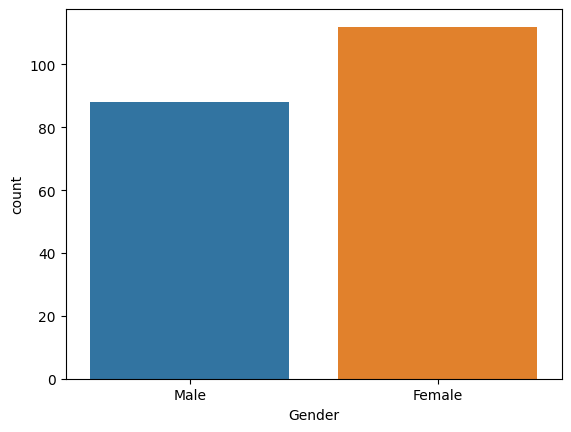

In [45]:
sns.countplot(x=df["Gender"])

<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

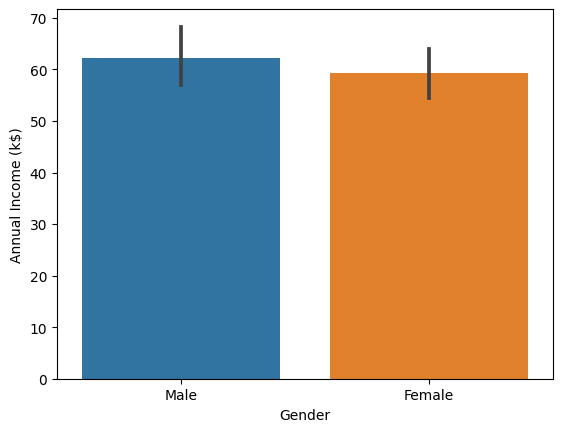

In [47]:
sns.barplot(x="Gender", y="Annual Income (k$)", data=df)

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

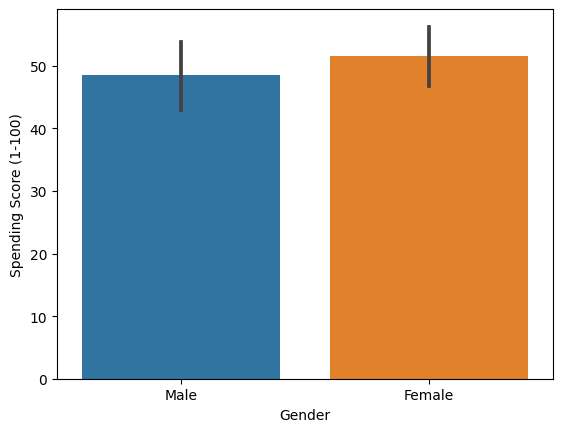

In [48]:
sns.barplot(x="Gender", y="Spending Score (1-100)", data=df)

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

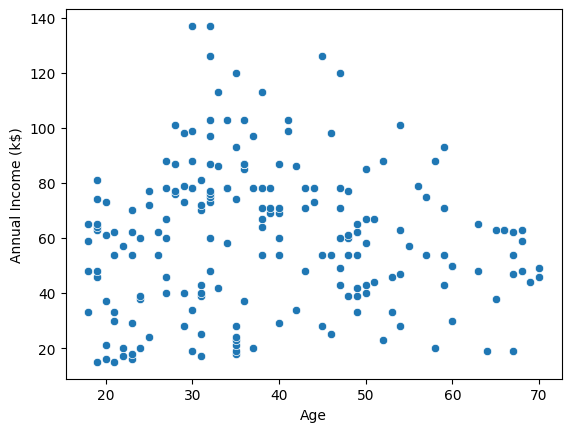

In [50]:
sns.scatterplot(x="Age", y="Annual Income (k$)", data=df)

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

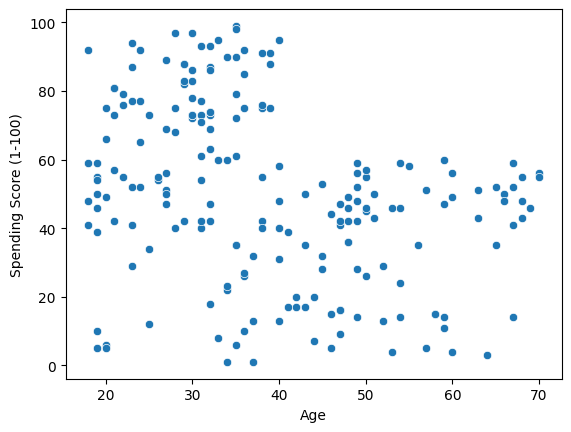

In [51]:
sns.scatterplot(x="Age", y="Spending Score (1-100)", data=df)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

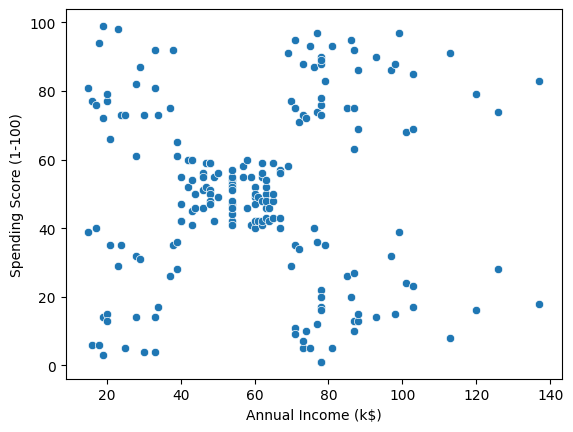

In [52]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)

- 그래프들로 알 수 있는 것
    - 특정 피쳐를 종속 변수로 두고 나머지 피쳐를 독립 변수로 두고 분석하기에는 서로 뚜렷한 관계를 가진 것처럼 보이는 피쳐들이 보이지 않음. 고로 군집 분석이 필요함.

## 주요 코드 미리보기
---

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

X = df.iloc[:, 3:]
sc = StandardScaler()
X = sc.fit_transform(X)

model = KMeans(n_clusters=2, random_state=42)                               # 200개의 서로 다른 인스턴스를 2개의 그룹(k = 2)으로 묶는다.
y_preds = model.fit_predict(X)
df["cluster"] = y_preds

print("Silhouette score: {0:.4f}".format(silhouette_score(X, y_preds)))     # 점수가 그렇게 높지 않다 => 군집 결과가 그닥 만족스럽지 않다. => k 값이 적절치 못하다.

Silhouette score: 0.3147


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

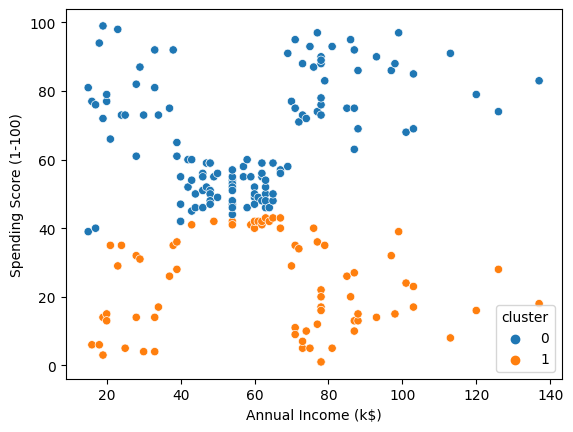

In [54]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df, hue="cluster")

## 코드 구현
---
앞서 시도해본 k 값이 그닥 높지 못한 실루엣 점수를 얻었기 때문에 더 좋은 점수를 가진 k 값을 알아내기 위한 코드를 구현한다.

In [56]:
silhouette_avg = []
for k in range(2,12):
    model = KMeans(n_clusters=k, random_state=42)
    y_preds = model.fit_predict(X)
    score = silhouette_score(X, y_preds)
    silhouette_avg.append(score)
    print("K = {0}, Silhouette Score = {1:.4f}".format(k, score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K = 2, Silhouette Score = 0.3147
K = 3, Silhouette Score = 0.4666
K = 4, Silhouette Score = 0.4939
K = 5, Silhouette Score = 0.5547


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K = 6, Silhouette Score = 0.5399
K = 7, Silhouette Score = 0.5263


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K = 8, Silhouette Score = 0.4558
K = 9, Silhouette Score = 0.4553
K = 10, Silhouette Score = 0.4476
K = 11, Silhouette Score = 0.4385


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


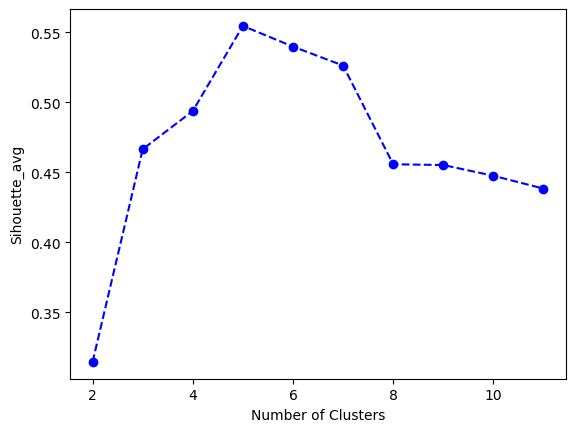

The greatest silhouette score appears when k = 5


In [58]:
plt.plot(range(2, 12), silhouette_avg, "bo--")
plt.xlabel("Number of Clusters")
plt.ylabel("Sihouette_avg")
plt.show()
print("The greatest silhouette score appears when k = 5")

In [59]:
model = KMeans(n_clusters=5, random_state=42)
y_preds = model.fit_predict(X)
df["clusters"] = y_preds

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

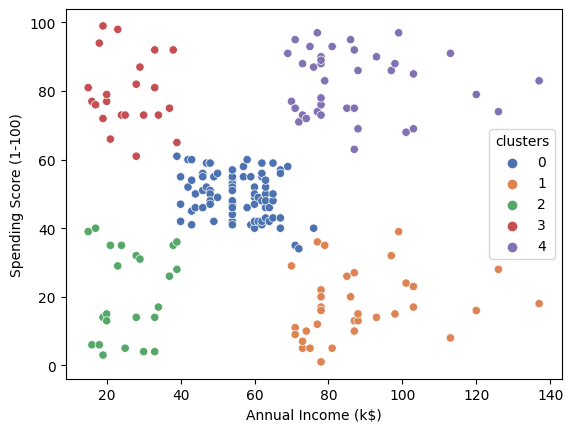

In [60]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df, hue="clusters", palette="deep")

클러스터별 특징 </br>
- 0 : 적당한 연소득과 적당한 소비를 하는 그룹
- 1 : 높은 연소득에 비해 소비가 적은 그룹
- 2 : 낮은 연소득과 적은 소비를 하는 그룹
- 3 : 낮은 연소득에 비해 소비가 많은 그룹
- 4 : 높은 연소득과 많은 소비를 하는 그룹

이러한 결과를 사용하여 고객의 연소득과 소비에 따라 마켓팅 전략이나 표시하게 할 광고 등을 선정할 수 있음.

<Axes: xlabel='clusters', ylabel='Spending Score (1-100)'>

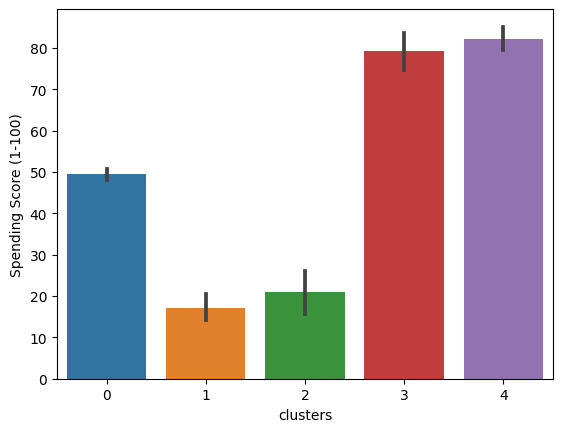

In [62]:
sns.barplot(x="clusters", y="Spending Score (1-100)", data=df)

<Axes: xlabel='clusters', ylabel='Annual Income (k$)'>

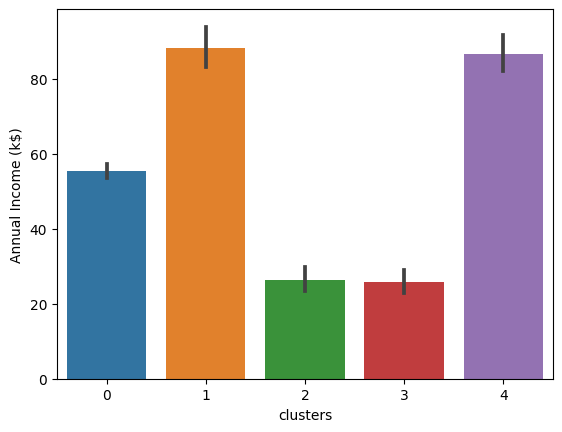

In [63]:
sns.barplot(x="clusters", y="Annual Income (k$)", data=df)

<Axes: xlabel='clusters', ylabel='count'>

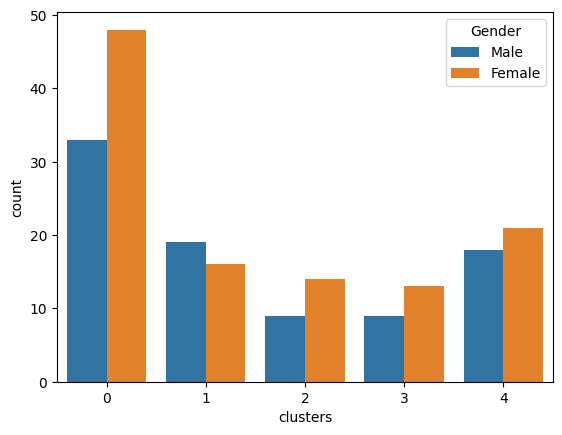

In [64]:
sns.countplot(x="clusters", data=df, hue="Gender")

<Axes: xlabel='clusters', ylabel='Age'>

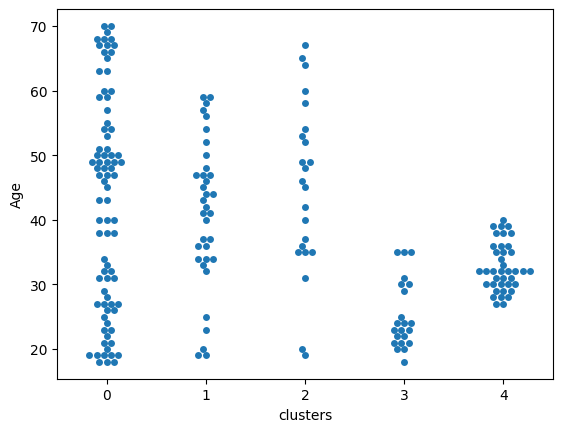

In [65]:
sns.swarmplot(x="clusters", y="Age", data=df)

위와 같은 플롯들로 각 클러스터의 특징을 잘 나타내는 적절한 이름을 부여해 줄 수 있음

# 인공신경망 구성하기

## 실습 목표
---
- Pytorch의 주요 기능 이해
- 주어진 데이터 셋을 활용하여 인공신경망 설계
- 인공신경망 학습 과정을 코드로 작성하고 학습이 완료된 모델 생성

## 문제 정의
---
Multiclass classifier

## 주요 코드

1. TensorDataset와 DataLoader
- 입력 데이터를 쉽게 처리하고, Batch 단위로 잘라서 학습할 수 있게 도와주는 모듈
- Dataset: 학습시 사용하는 feature와 target의 pair로 이루어짐
    - 아래의 코드에서는 TensorDataset을 사용하여 Dataset 인스턴스를 생성했지만, 이미지를 사례와 같이 Dataset 클래스를 상속받아서 커스텀 인스턴스를 생성하는 형태로 많이 사용
- DataLoader: 학습 시, 각 인스턴스에 쉽게 접근할 수 있도록 순회 가능한 객체(iterable)를 생성


In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
# X, y로 분할한 데이터를 tensor로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
y_test = torch.tensor(y_test, dtype=torch.int64)

In [ ]:
# tensor를 TensorDataset으로 생성 - X와 y가 짝으로 이루어짐
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [ ]:
# DataLoader 형태로 생성
train_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=10, shuffle=True)

2. Device 설정
- 일반적으로 인공신경망의 학습은 GPU를 사용하는 것이 바람직함
    - Colab 런타임 설정 변경
- GPU를 사용하여 학습을 진행하도록 명시적으로 작성 필요
- 연산 유형에 따라 GPU에서 수행이 불가능한 경우도 존재하는데, 그럴 경우도 마찬가지로 명시적으로 어떤 프로세서에서 연산을 수행해야 하는지 코드로 작성해야 함.

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = NeuralNetwork().to(device)

3. 신경망 생성
- torch.nn 패키지는 신경망 생성 및 학습 시 설정해야하는 다양한 기능을 제공

In [4]:
import torch.nn as nn

- 신경망을 nn.Module을 상속받아 정의하고, 아래 두 메소드를 정의해야 함.
    - ```__init__()```: 신경망에서 사용할 layer를 초기화하는 부분
    - ```forward()```: feed forward 연산 수행 시, 각 layer의 입출력이 어떻게 연결되는지를 지정

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.input_layer = nn.Linear(4, 16)         # self. 뒤에 나오는 것은 그냥 레이어의 이름. - 4개의 노드, 16개의 출력 노드를 가지는 레이어
        self.hidden_layer1 = nn.Linear(16, 32)
        self.output_layer = nn.Linear(32, 3)
        self.relu = nn.ReLU()                       # 활성화 함수 - ReLU

    def forward(self, x):
        out = self.relu(self.input_layer(x))        # 4  --ReLU--> 16개
        out = self.relu(self.hidden_layer1(out))    # 16 --ReLU--> 32개
        out = self.output_layer(out)                # 32 --ReLU--> 3개
        return out

4. Model Compile
- 학습 시 필요한 정보들(Loss function, Optimizer) 선언
- 일반적으로 loss와 optimizer는 아래와 같이 변수로 선언하고, 변수를 train/test 시 참고할 수 있도록 매개변수로 지정


In [ ]:
learning_rate = 0.01
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

5. Train
- 신경망의 학습과정을 별도의 함수로 구성하는 것이 일반적
    - feed forward -> loss -> error back propagation -> (log) -> (반복)

In [ ]:
def train_loop(train_loader, model, loss_fn, optimizer):
    # train_loader : 학습할 때 필요한 데이터셋을 담아둔 데이터 로더
    # model : 신경망 모델
    # loss_fn : 비용함수
    # optimizer : 아담으로 정해놨던 부분
    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device)
        pred = model(X)                     # feed forward
        loss = loss_fn(pred, y)             # loss
        optimizer.zero_grad()               # optimizer 사용해서 초기화
        loss.backward()                     # loss 역전파
        optimizer.step()                    # 아담 옵티마이저 최적화

6. Test
- 학습 과정과 비슷하지만 역전파 과정이 빠짐
    - feed forward -> loss -> (log) -> (반복)

In [ ]:
def test_loop(test_loader, model, loss_fn):
    size = len(test_loader.dataset)
    num_batches = len(test_loader)
    test_loss, correct = 0, 0

    with torch.no_grad():                                                   # Gradient 연산 안 한다.
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item() # 주어진 문제가 분류인 상황이라 예측값과 실제값의 대조 결과를 담아줌

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:8f}\n")

7. Iteration
- 신경망 학습은 여러 epochs을 반복해서 수행하면서 모델을 구성하는 최적의 파라미터를 찾음
- 지정한 epochs 수만큼 학습 과정과 평가 과정을 반복하면서 모델의 성능(loss, accuracy 등)을 체크

In [ ]:
epochs = 10
for i in range(epochs):
    print(f"Epoch {i+1} \n ---------------------")
    train_loop(train_dataloader, model, loss, optimizer)
    test_loop(test_dataloader, model, loss)
print("Done")

# Basic Neural Network
iris dataset을 사용하여 품종을 구분하는 분류기를 신경망을 사용하여 구현

## [Step1] Load libraries & Datasets

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# importing data
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["label"] = iris.target

# split data
df.head()
y = df["label"]
X = df.drop(["label"], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=42, stratify=y)

## [Step2] Create DataLoader

In [10]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
y_test = torch.tensor(y_test, dtype=torch.int64)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=10, shuffle=True)

<ipython-input-10-3f5bf07e47ed>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-10-3f5bf07e47ed>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
<ipython-input-10-3f5bf07e47ed>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.int64)
<ipython-input-10-3f5bf07e47ed>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceT

## [Step3] Set Network Structure

In [11]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.input_layer = nn.Linear(4, 16)
        self.hidden_layer1 = nn.Linear(16, 32)
        self.output_layer = nn.Linear(32, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.relu(self.input_layer(x))
        out = self.relu(self.hidden_layer1(out))
        out = self.output_layer(out)
        return out

## [Step4] Create Model instance

In [12]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"The current device is : {device}")

model = NeuralNetwork().to(device)

The current device is : cuda


## [Step5] Mobile compile

In [13]:
learning_rate = 0.001
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## [Step6] Set train loop

In [14]:
def train_loop(train_loader, model, loss_fn, optimizer):
    size = len(train_loader.dataset)

    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device)
        pred = model(X)

        # 손실 계산
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss, current = loss.item(), batch * len(X)
        print(f"loss: {loss:>7f} [{current:>5d}]/{size:5d}")

## [Step7] Set test loop

In [16]:
def test_loop(test_loader, model, loss_fn):
    size = len(test_loader.dataset)
    num_batches = len(test_loader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error : \n Accuracy : {(100*correct):>0.1f}%, Avg loss: {test_loss:8f}\n")

## [Step8] Run model

In [19]:
epochs = 10

for i in range(epochs):
    print(f"Epoch {i+1} \n-------------------------------------")
    train_loop(train_dataloader, model, loss, optimizer)
    test_loop(test_dataloader, model, loss)
print("Done")

Epoch 1 
-------------------------------------
loss: 0.287859 [    0]/  112
loss: 0.322583 [   10]/  112
loss: 0.313287 [   20]/  112
loss: 0.255083 [   30]/  112
loss: 0.135042 [   40]/  112
loss: 0.321999 [   50]/  112
loss: 0.259046 [   60]/  112
loss: 0.342414 [   70]/  112
loss: 0.384772 [   80]/  112
loss: 0.271886 [   90]/  112
loss: 0.278610 [  100]/  112
loss: 0.283924 [   22]/  112
Test Error : 
 Accuracy : 100.0%, Avg loss: 0.307099

Epoch 2 
-------------------------------------
loss: 0.227911 [    0]/  112
loss: 0.299731 [   10]/  112
loss: 0.267566 [   20]/  112
loss: 0.304035 [   30]/  112
loss: 0.200206 [   40]/  112
loss: 0.347450 [   50]/  112
loss: 0.177852 [   60]/  112
loss: 0.358790 [   70]/  112
loss: 0.151715 [   80]/  112
loss: 0.337426 [   90]/  112
loss: 0.252512 [  100]/  112
loss: 0.223215 [   22]/  112
Test Error : 
 Accuracy : 97.4%, Avg loss: 0.288972

Epoch 3 
-------------------------------------
loss: 0.206267 [    0]/  112
loss: 0.313104 [   10]/  11